Cleaned columns: ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']
Average mark: 10.415189873417722


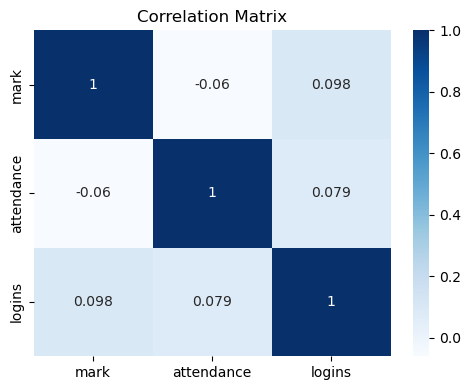

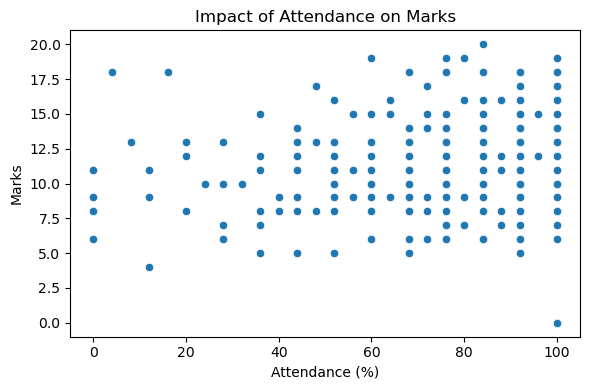

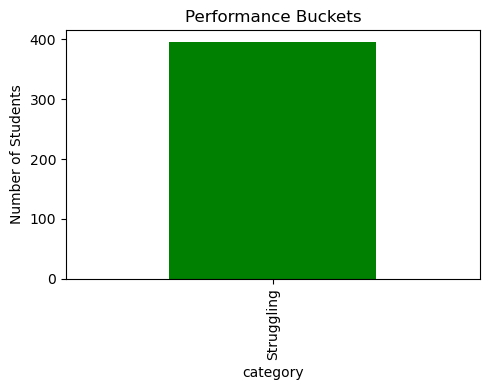

In [1]:
# Step 1 – Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Step 2 – Load dataset
df = pd.read_csv('C:\\Users\\Fankaar\\Desktop\\student_dashboard\\data\\students.csv.csv',sep=';', encoding='utf-8-sig')
df.columns = df.columns.str.strip().str.lower().str.replace('\ufeff', '')

# Show cleaned column names
print("Cleaned columns:", df.columns.tolist())               # convert all to lowercase


# Step 3 – Quick clean and add needed columns
df = df.dropna()

# Create 'mark' from G3 (final exam mark)
df['mark'] = df['g3']

# Estimate attendance percentage from absences
df['attendance'] = 100 - df['absences'] * 4
df['attendance'] = df['attendance'].clip(lower=0)  # keep min 0

# Simulate LMS login count from studytime
df['logins'] = df['studytime'] * 5  # assumed value

# Step 4 – Basic stats
avg_marks = df['mark'].mean()
print("Average mark:", avg_marks)

# Step 5 – Correlation heat-map
plt.figure(figsize=(5, 4))
corr = df[['mark', 'attendance', 'logins']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('C:\\Users\\Fankaar\\Desktop\\student_dashboard\\output\\correlation.png')
plt.show()

# Step 6 – Attendance vs Marks scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='attendance', y='mark', data=df)
plt.xlabel('Attendance (%)')
plt.ylabel('Marks')
plt.title('Impact of Attendance on Marks')
plt.tight_layout()
plt.savefig('C:\\Users\\Fankaar\\Desktop\\student_dashboard\\output\\attendance_vs_marks.png')
plt.show()

# Step 7 – Top vs Struggling bar chart
df['category'] = df['mark'].apply(lambda x: 'Top' if x >= 75 else ('Struggling' if x < 40 else 'Average'))
counts = df['category'].value_counts()

plt.figure(figsize=(5, 4))
counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.ylabel('Number of Students')
plt.title('Performance Buckets')
plt.tight_layout()
plt.savefig('C:\\Users\\Fankaar\\Desktop\\student_dashboard\\output\\buckets.png')
plt.show()
